# Credit Card Approval Challenge

### Introduction

This project focuses on predicting the approval of credit card applications based on applicant information and past credit behavior. Using a combination of exploratory data analysis (EDA), feature engineering, and advanced machine learning models, we aim to identify key factors influencing credit approval decisions and build a robust predictive model.   

The dataset contains:     
    - `Applicant Information`: Demographics, income, employment details, and family status.    
    - `Credit Records`: Historical credit behavior, including overdue payments and monthly balances.    
  
The goal is to:    
    - Understand the data through visualization and analysis.    
    - Engineer meaningful features to improve model performance.    
    - Address class imbalance and optimize models using advanced techniques like Randomized Search and Grid Search.     
    - Compare and evaluate machine learning models to determine the best approach for predicting credit card approval.     

This notebook provides a comprehensive workflow to tackle the problem and deliver actionable insights.    

## Table of Contents

- [1 - Packages Import](#1) 
- [2 - Data Overview](#2)
     - [2.1 - Load the Data](#2-1)
     - [2.2 - Overview of the data](#2-2)
        - [2.2.1 - DataSet Columns Explanation (application records)](#2-2-1)
        - [2.2.2 - DataSet Columns Explanation (Credit records)](#2-2-2)
     - [2.3 - Construct the complete dataset (Overview)](#2-3)
- [3 - Data preprocessing](#3)
    - [3.1 - Adding Target variable](#3-1)
    - [3.2 - Construct the complete dataset (Revisited)](#3-2)
    - [3.3 - Data types and general info about the dataset](#3-3)
    - [3.4 - Duplicates and null values](#3-4)
    - [3.5 - Column names](#3-5)
    - [3.6 - Categorical Variables](#3-6)
    - [3.7 - Check for outlier](#3-7)
- [4 - Feature Engineering](#4)
- [5 - Train, Validation, Test Split](#5)
- [6 - EDA](#6)
- [7 - Modeling](#7)
    - [7.1 Model selection](#7.1)
    - [7.2 Model finetuning](#7.2)
        - [7.2.1 Random search](#7.2.1)
- [8 - Model testing](#8)
- [9 - Conclusion](#9)

<a name='1'></a>
## 1 - Packages Import

<a name='2'></a>
## 2- Data Overview

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV, GridSearchCV, cross_val_predict, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import learning_curve

<a name='2-1'></a>
### 2-1 - Load the Data

In [2]:
app_rec_df = pd.read_csv('application_record.csv')
credit_rec_df = pd.read_csv('credit_record.csv')

<a name='2-2'></a>
### 2-2 - Overview of the data

In [3]:
# overveiw of the application records data
app_rec_df.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
# look at the shape of the application records data
app_rec_df.shape

(438557, 18)

<a name='2-2-1'></a>
#### 2.2.1 DataSet Columns Explanation (application records)

This data contains `18` columns and `438557` rows. The explanation of what each column represents is shown in the following table.   

| Feature name              | Explanation | Remarks |
| :---------------- | :------: | :----: |
| ID        |   Client number   |  |
| CODE_GENDER           |   Gender   |  |
| FLAG_OWN_CAR    |  Is there a car   |  |
| FLAG_OWN_REALTY |  Is there a property	   |  |
| CNT_CHILDREN  |  	Number of children   |  |
| AMT_INCOME_TOTAL |  Annual income	   |  |
| NAME_INCOME_TYPE |  Income category	   |  |
| NAME_EDUCATION_TYPE | Education level 	   |  |
| NAME_FAMILY_STATUS	 |  Marital status	   |  |
| NAME_HOUSING_TYPE | Way of living 	   |  |
| DAYS_BIRTH |  Birthday	   | Count backward from current day (0), -1 means yesterday  |
| DAYS_EMPLOYED |  Start date of employment	   | Count backwards from current day(0). If positive, it means the person is currently unemployed. |
| FLAG_MOBIL  |  Is there a mobile phone	   |  |
| FLAG_WORK_PHONE |  Is there a work phone	   |  |
| FLAG_PHONE  | Is there a phone 	   |  |
| FLAG_EMAIL |  Is there an email	   |  |
| OCCUPATION_TYPE |  Occupation		   |  |
| CNT_FAM_MEMBERS |  Family size		   |  |

In [5]:
# overview of credit record data 
credit_rec_df.head(5)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [6]:
# look at the shape of the credit record data
credit_rec_df.shape

(1048575, 3)

<a name='2-2-2'></a>
#### 2.2.2 DataSet Columns Explanation (application records)

This data contains `3` columns and `1048575` rows. the explanation of what each column represents is shown in the following table.   

| Feature name              | Explanation | Remarks |
| :---------------- | :------: | :----: |
| ID | Client number |  |
| MONTHS_BALANCE | Record month | The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on |
| STATUS | Status | `0: 1-29 days past due`   |
|        |        | `1: 30-59 days past due`  |
|        |        | `2: 60-89 days overdue`   |
|        |        | `3: 90-119 days overdue`  |
|        |        | `4: 120-149 days overdue` |
|        |        | `5: Overdue or bad debts ,write-offs for more than 150 days` |
|        |        | `C: paid off that month`   |
|        |        | `X: No loan for the month` |

There are two tables, which are connected by ID. `application_record.csv` contains appliers personal information, which we could use as features for predicting.
`credit_record.csv` records users' behaviors of credit card.

<a name='2-3'></a>
### 2-3 Construct the complete dataset (Overview)

To construct the complete dataset from the 2 files we will join the 2 tables on the `ID` column. But first, let's take a closer look at this column in the 2 files. We will perform an `outer` join to include all data from both tables in our dataset, and then preprocess to end up with only the points that have both `application records` and `credit card records` so we can predict the approval.

In [7]:
# let's finde out how many unique IDs there is in the application records
print(app_rec_df['ID'].nunique()," Unique IDs in the application records")

438510  Unique IDs in the application records


In [8]:
# also let's finde out how many unique IDs there is in the credit records
print(credit_rec_df['ID'].nunique()," Unique IDs in the credit records")

45985  Unique IDs in the credit records


In [9]:
# finally let's finde out how many records have the full information ( application and credit records)
print(len(set(app_rec_df['ID']).intersection(set(credit_rec_df['ID']))), "Unique IDs in Both Tables")

36457 Unique IDs in Both Tables


So, we expect to have `36457` entry in our complete dataset **after data preprocessing** 

<a name='3'></a>
## 3- Data preprocessing

Before we begin any data preprocessing we notice something important, which is there is no `Target` variable!. So, before starting any data preprocessing methods we will address this problem first.

<a name='3-1'></a>
### 3-1 Adding Target variable 

To create the target variable we first need to understand how banks classify if the customer is at risk or not, after some research and with the help of ChatGpt we found the follwoing:  

 *In the financial industry, a customer's credit risk is primarily assessed based on their payment history and the duration of any overdue payments.
 Delinquency refers to the failure to make timely payments on credit obligations, and the severity of delinquency is often categorized by the number of days a payment is past due.*

 *Financial institutions monitor these delinquency thresholds to manage credit risk. For example, banks may classify open-end credit accounts (like credit cards) that are 90 days past    due as substandard and charge-off accounts that are 180 days past due.*

 **In summary, a customer is considered at risk after missing a payment, with the severity escalating as the delinquency period extends. Financial institutions use specific thresholds to classify and manage delinquent accounts, `with significant actions typically occurring after 90 days of nonpayment.`**


Some references for more readings:
- [How Credit Card Delinquency Works](https://www.investopedia.com/articles/pf/11/intro-to-credit-card-delinquency.asp?utm_source=chatgpt.com)
- [Chapter XI. – Adverse Classifications](https://www.fdic.gov/credit-card-activities-manual/chapter-xi-adverse-classifications?utm_source=chatgpt.com)
- [Delinquent Account Credit Card: Definition, Example, Impact](https://www.investopedia.com/terms/d/delinquent-account-credit-card.asp?utm_source=chatgpt.com)


So, based on the above we will choose delays of `more than 90 days (i.e. status = 3`)  as the cutoff. considring every payment that is overdue is less than 90 days as `no_risk` and above as `risk`.

In [10]:
# let's create the target varaibel
# create a temp. column to hold the classification
credit_rec_df['is_risk'] = None  # Initialize the column

# Populate the 'is_risk' column based on the criteria
credit_rec_df.loc[credit_rec_df['STATUS'].isin(['3', '4', '5']), 'is_risk'] = 'Yes'

In [11]:
# check to see if our implementation is working
credit_rec_df['STATUS'][credit_rec_df['is_risk'] == 'Yes'].value_counts()

STATUS
5    1693
3     320
4     223
Name: count, dtype: int64

In [12]:
# Create a binary target variable (1 for high-risk customers, 0 otherwise)
risk_count = credit_rec_df.groupby('ID').count()  
risk_count['target'] = None  

risk_count.loc[risk_count['is_risk'] > 0, 'target'] = 1
risk_count.loc[risk_count['is_risk'] == 0, 'target'] = 0


In [13]:
risk_count['target'].value_counts()

target
0    45654
1      331
Name: count, dtype: int64

In [14]:
target = risk_count[['target']]

Now that we have calculated the target variable from the credit records table, there is only one information left that could be useful to us which is the starting point of a customer's credit history which is represented by the `MONTHS_BALANCE` column. If we grouped by the ID and then selected the `min` we will end up with customer's credit history


In [15]:
# extract the smallest number as it indicates the beginging of customer's credit record history
customer_history = pd.DataFrame(credit_rec_df.groupby(["ID"])["MONTHS_BALANCE"].agg("min"))

<a name='3-2'></a>
### 3.2 - Construct the complete dataset (Revisited)

Now we will begin constructing the complete data frame

In [16]:
# left join to include everything from the applications record and only matched element from customer credit history
temp_df = pd.merge(app_rec_df, customer_history, how='left', on = 'ID')

In [17]:
# now use inner join to include the target variable and only entries that has applications and credit records
total_credit_df = pd.merge(temp_df, target, how='inner', on='ID')

In [18]:
total_credit_df.shape

(36457, 20)

We can see that the number of rows matches our expectations from the previous section.

In [19]:
# take a brief look at the target variable classes
total_credit_df['target'].value_counts()

target
0    36155
1      302
Name: count, dtype: int64

We can see that there is a severe class imbalance. This can be addressed in many ways including `SMOTE`.

<a name='3-3'></a>
### 3.3 - Data types and general info about the dataset

In [20]:
# let's take a look on the Data types
total_credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

We can see that almost all the columns (except `OCCUPATION_TYPE`) do not contain missing values and the data types appear to be okay.

In [21]:
# let's quickly look at some stats about the data
stats = total_credit_df.describe()
stats

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
count,3.645700e+04,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.0,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.430315,1.866857e+05,-15975.173382,59262.935568,1.0,0.225526,0.294813,0.089722,2.198453,-26.164193
std,4.187524e+04,0.742367,1.017892e+05,4200.549944,137651.334859,0.0,0.417934,0.455965,0.285787,0.911686,16.501854
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,5.042028e+06,0.000000,1.215000e+05,-19438.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000
50%,5.074614e+06,0.000000,1.575000e+05,-15563.000000,-1552.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000
75%,5.115396e+06,1.000000,2.250000e+05,-12462.000000,-408.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


In [22]:
# We can conclude some useful information from the table above like the following
print("The mean age of the customers in this data set is:", abs(int(stats.loc['mean', 'DAYS_BIRTH'] / 365)), "And an std of +/-:", abs(int(stats.loc['std', 'DAYS_BIRTH'] / 365)))
print("The mean total income of the customers in this data set is:",
      round(stats.loc['mean', 'AMT_INCOME_TOTAL'], 2), "$", "And an std of +/-:", 
      round(stats.loc['std', 'AMT_INCOME_TOTAL'], 2), '$')
# other useful info
print("Male and Female % \n", total_credit_df['CODE_GENDER'].value_counts(normalize=True))

The mean age of the customers in this data set is: 43 And an std of +/-: 11
The mean total income of the customers in this data set is: 186685.74 $ And an std of +/-: 101789.23 $
Male and Female % 
 CODE_GENDER
F    0.670105
M    0.329895
Name: proportion, dtype: float64


<a name='3-4'></a>
### 3.4 - Duplicates and null values

In [23]:
# check for duplicates
total_credit_df.duplicated().sum()

0

In [24]:
# check for null values
total_credit_df.isna().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
MONTHS_BALANCE             0
target                     0
dtype: int64

We can see that there is `11323` values missing from `OCCUPATION_TYPE` column. we will address this problem shortly.

<a name='3-5'></a>
### 3.5 - Column names

In [25]:
# in this step we will rename the columns to a more and intuitive names
total_credit_df.rename(columns={'CODE_GENDER':'gender','FLAG_OWN_CAR':'car_owned','FLAG_OWN_REALTY':'reality_owned',
                                'CNT_CHILDREN':'child_count','AMT_INCOME_TOTAL':'annual_income', 'NAME_INCOME_TYPE':'income_category',
                                'NAME_EDUCATION_TYPE':'edu_level','NAME_FAMILY_STATUS':'marital_status',
                                'NAME_HOUSING_TYPE':'way_of_living','DAYS_BIRTH': 'age(days)', 'DAYS_EMPLOYED':'employment_start_day',
                                'FLAG_MOBIL':'mobile', 'FLAG_WORK_PHONE':'work_phone', 
                                'FLAG_PHONE':'phone', 'FLAG_EMAIL':'email', 
                                'OCCUPATION_TYPE':'occupation', 'CNT_FAM_MEMBERS':'family_size', 'MONTHS_BALANCE': 'credit_history_month'
                        },inplace=True)

In [26]:
total_credit_df.columns

Index(['ID', 'gender', 'car_owned', 'reality_owned', 'child_count',
       'annual_income', 'income_category', 'edu_level', 'marital_status',
       'way_of_living', 'age(days)', 'employment_start_day', 'mobile',
       'work_phone', 'phone', 'email', 'occupation', 'family_size',
       'credit_history_month', 'target'],
      dtype='object')

<a name='3-6'></a>
### 3.6 - Categorical Variables

let's investigate closely the categorical data present in this dataset

In [27]:
categorical_columns = [('gender', 'nominal'), ('car_owned', 'nominal'), ('reality_owned', 'nominal'), 
                       ('income_category', 'nominal'), ('edu_level', 'ordinal'), ('marital_status', 'nominal'),
                       ('way_of_living', 'nominal'),  ('mobile', 'nominal'), ('work_phone', 'nominal') , ('phone', 'nominal'), ('email', 'nominal'), ('occupation', 'nominal')]

In [28]:
for cat_col in categorical_columns:
    series = total_credit_df[cat_col[0]].value_counts()
    print(series)
    print(f'there are {series.shape[0]} {cat_col[1]} categories')
    print("----"*10)

gender
F    24430
M    12027
Name: count, dtype: int64
there are 2 nominal categories
----------------------------------------
car_owned
N    22614
Y    13843
Name: count, dtype: int64
there are 2 nominal categories
----------------------------------------
reality_owned
Y    24506
N    11951
Name: count, dtype: int64
there are 2 nominal categories
----------------------------------------
income_category
Working                 18819
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: count, dtype: int64
there are 5 nominal categories
----------------------------------------
edu_level
Secondary / secondary special    24777
Higher education                  9864
Incomplete higher                 1410
Lower secondary                    374
Academic degree                     32
Name: count, dtype: int64
there are 5 ordinal categories
----------------------------------------
marital_status
Married                 250

In [29]:
# look at chiled_count column to see how many category
total_credit_df['child_count'].value_counts()

child_count
0     25201
1      7492
2      3256
3       419
4        63
5        20
14        3
7         2
19        1
Name: count, dtype: int64

Now children column is not a categorical value but we can easily convert it to one (ordinal values). In doing that we will simplify the data and focus on general trends.

In [30]:
def convert_child_count(value):
    """converts child_count column from numirical to category"""
    if value == 0:
        return "0"
    elif value == 1:
        return "1"
    else:
        return "2 or more"


# Apply transformation
total_credit_df['child_count_category'] = total_credit_df['child_count'].apply(convert_child_count)
# drop 'child_count' column
total_credit_df.drop(axis=1, columns=['child_count'], inplace=True)
# test the categries
total_credit_df['child_count_category'].value_counts()

child_count_category
0            25201
1             7492
2 or more     3764
Name: count, dtype: int64

Similar to the children column `family_size` is not a categorical value but we can easily convert it to be one (ordinal values). In doing that we will simplify the data and focus on general trends.

In [31]:
total_credit_df['family_size'].value_counts()

family_size
2.0     19463
1.0      6987
3.0      6421
4.0      3106
5.0       397
6.0        58
7.0        19
15.0        3
9.0         2
20.0        1
Name: count, dtype: int64

In [32]:
def convert_family_size(value):
    """converts family_size column from numirical to category"""
    if value == 1.0:
        return "1"
    elif value == 2.0:
        return "2"
    elif value == 3.0:
        return "3"
    else: 
        return "4 or more"


# Apply transformation
total_credit_df['family_size_category'] = total_credit_df['family_size'].apply(convert_family_size)
# drop 'family_size' column
total_credit_df.drop(axis=1, columns=['family_size'], inplace=True)
# test the categries
total_credit_df['family_size_category'].value_counts()

family_size_category
2            19463
1             6987
3             6421
4 or more     3586
Name: count, dtype: int64

looking back at the occupation column which contains 11323 missing values 
we can fill these missing values by simply making them equal to the most popular class


In [33]:
total_credit_df.fillna({'occupation': "Laborers"} , inplace=True)

In [34]:
# check for null values again
total_credit_df.isna().sum()

ID                      0
gender                  0
car_owned               0
reality_owned           0
annual_income           0
income_category         0
edu_level               0
marital_status          0
way_of_living           0
age(days)               0
employment_start_day    0
mobile                  0
work_phone              0
phone                   0
email                   0
occupation              0
credit_history_month    0
target                  0
child_count_category    0
family_size_category    0
dtype: int64

Now that we have investigated the categorical data up close editing, adding new categories and finally identifying which is nominal and which is categorical. This step will be used later on in this notebook to stage the data before fitting the model. 

<a name='3-7'></a>
### 3.7 - Check for outlier

We will plot the bar plots of the numeric data to see if there are outliers or not

In [35]:
# Calculate boundaries for outliers using the IQR (Interquartile Range) method
def plot_hist_special(data:pd.DataFrame, col:str, plot_bounds:bool=True):
    """
         plots a histogram with upper and lower boundaries represented as vertical lines on the graph

         Args:
             - data(pandas dataframe): the input data
             - col(string): column name to be plotted
             - plot_bounds(boolean): a flag to indicate whthere to plot a vertical line to represent the boundaries or not
        Return:
            bounds(tuple): upper and lower bounds respectively
    """
    
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    bounds = (upper_bound, lower_bound)
    # Plot the data
    plt.figure(figsize=(10, 6))
    sns.histplot(x=col, data=data, color="skyblue", bins=30)
    if plot_bounds:
        # Add horizontal lines for boundaries
        plt.axvline(lower_bound, color="red", linestyle="--", label=f"Lower Bound ({lower_bound:.2f})")
        plt.axvline(upper_bound, color="red", linestyle="--", label=f"Upper Bound ({upper_bound:.2f})")
        plt.legend()
    # Add labels and title
    plt.title("Histogram Plot with Outlier Boundaries", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    
    plt.show()
    
    return bounds

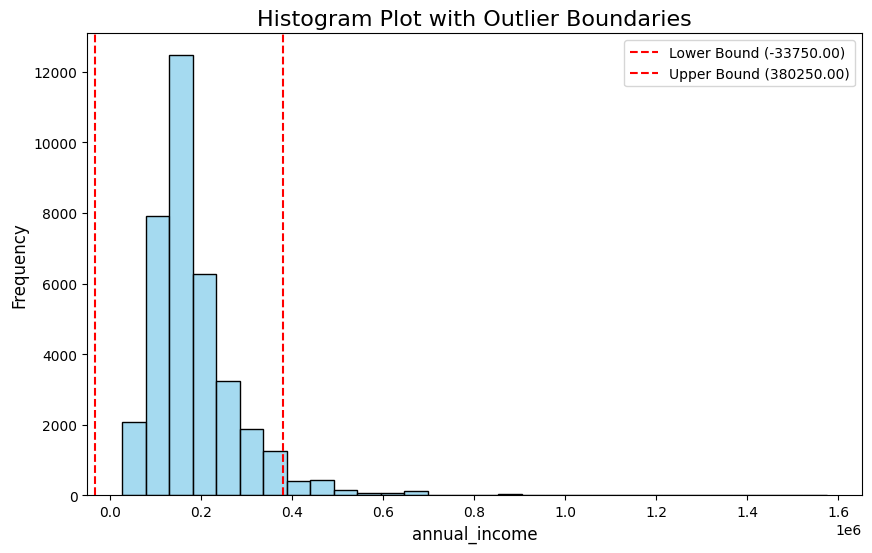

In [36]:
bounds = plot_hist_special(total_credit_df, 'annual_income')

From the plot, we can see that there are data points that exceed the upper bound and thus are considered outliers. 

In [37]:
# Removing outlier
total_credit_df = total_credit_df[(total_credit_df['annual_income'] >= bounds[1]) & (total_credit_df['annual_income'] <= bounds[0])]
total_credit_df.shape

(34928, 20)

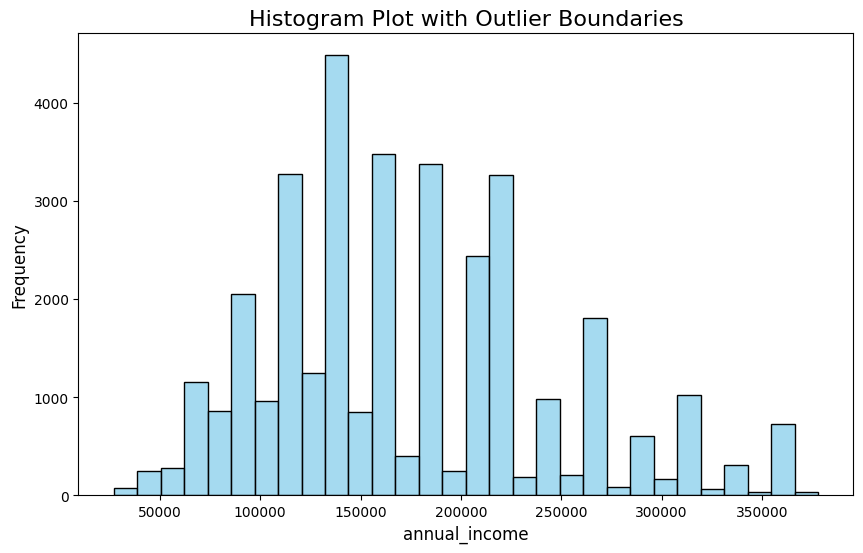

In [38]:
# plot after removing outlier
_ = plot_hist_special(total_credit_df, 'annual_income', False)

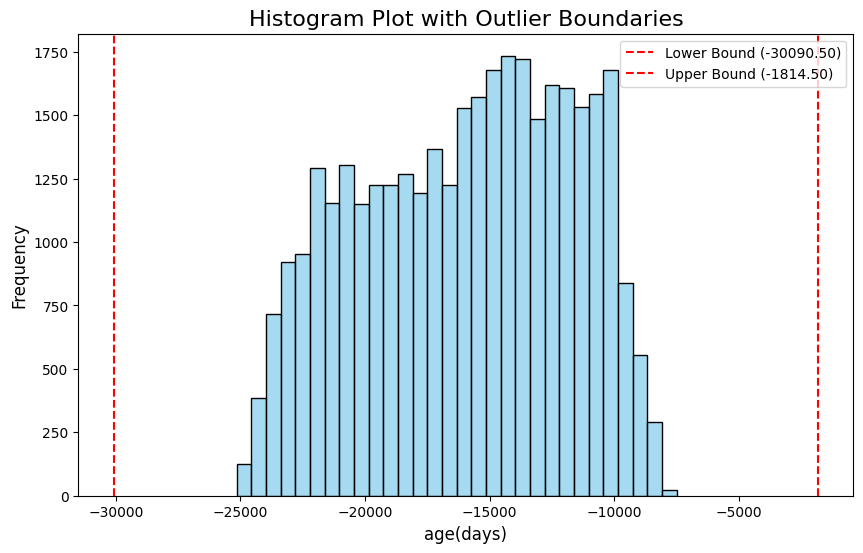

(-1814.5, -30090.5)

In [39]:
plot_hist_special(total_credit_df, 'age(days)') 

We can see that there are no outlier in the Age column

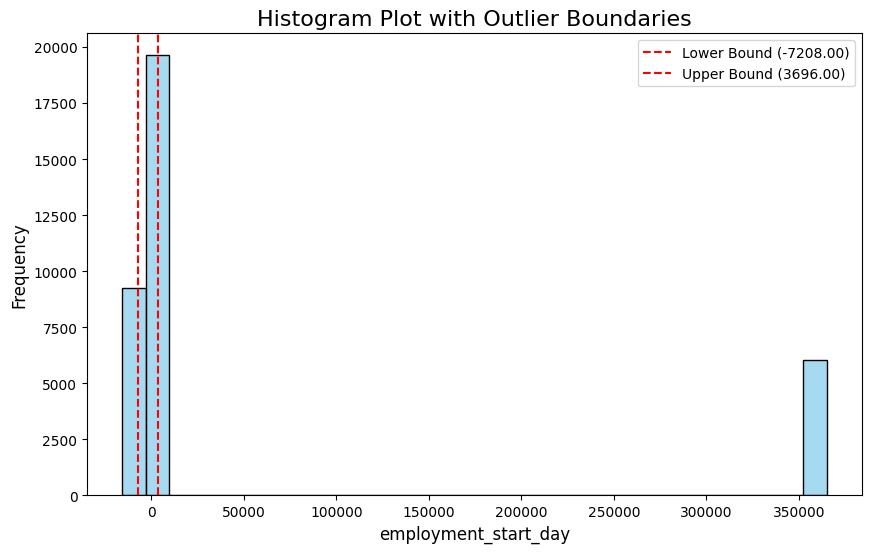

In [40]:
bounds = plot_hist_special(total_credit_df, 'employment_start_day')

From the plot, we can see that there are data points that exceed the upper and lower bounds and thus are considered an outlier.

In [41]:
# Removing outlier
total_credit_df = total_credit_df[(total_credit_df['employment_start_day'] >= bounds[1]) & (total_credit_df['employment_start_day'] <= bounds[0])]
total_credit_df.shape

(27115, 20)

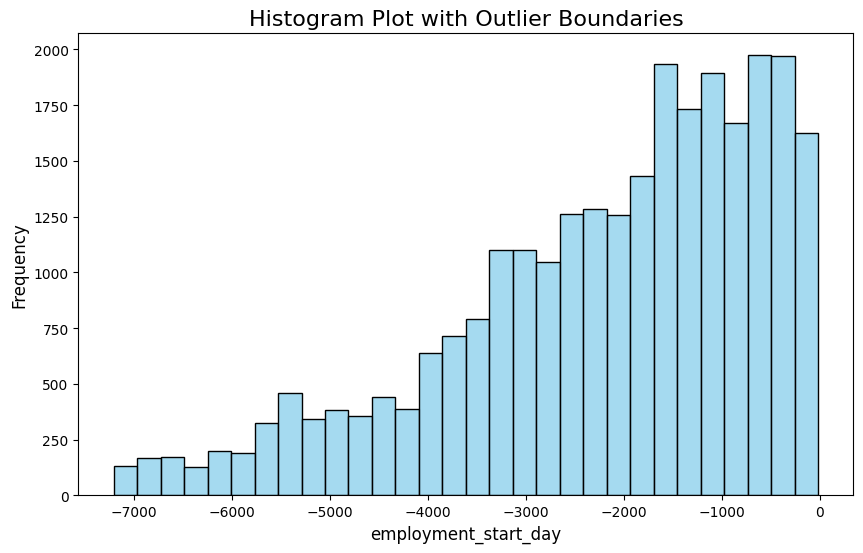

In [42]:
_ = plot_hist_special(total_credit_df, 'employment_start_day', False)

<a name='3-8'></a>
### 3.8 - Correct data values

After understanding what each variable means and what its values represent, we can easily correct these data to be more intuitive.

In [43]:
total_credit_df[['age(days)', 'employment_start_day', 'credit_history_month']] = total_credit_df[['age(days)', 'employment_start_day', 'credit_history_month']] * -1

In [44]:
# look at the max and min to make sure there was no negative values
total_credit_df[['age(days)', 'employment_start_day', 'credit_history_month']].describe()

,age(days),employment_start_day,credit_history_month
count,27115.000000,27115.000000,27115.000000
mean,14530.017075,2203.810806,26.067822
std,3449.731209,1626.805376,16.440971
min,7489.000000,17.000000,-0.000000
25%,11714.000000,904.000000,12.000000
50%,14211.000000,1809.000000,24.000000
75%,17081.000000,3165.000000,39.000000
max,24449.000000,7205.000000,60.000000


<a name='4'></a>
## 4 - Feature Engineering


We will drive 2 new features from existing features and drop the old ones as well as drop unnecessary features

In [45]:
# Calculate 'age_years' by dividing 'age(days)' by -365
total_credit_df['age_yr'] = (total_credit_df['age(days)'] // 365)

# Calculate 'employment_duration_yr' by dividing 'employment_start_day' by -365
total_credit_df['employment_duration_yr'] = (total_credit_df['employment_start_day'] // 365).round(1)

In [46]:
unnessccery_cols = ['age(days)', 'employment_start_day', 'ID']
total_credit_df.drop(columns=unnessccery_cols, inplace=True)

In [47]:
total_credit_df.head()

,gender,car_owned,reality_owned,annual_income,income_category,edu_level,marital_status,way_of_living,mobile,work_phone,phone,email,occupation,credit_history_month,target,child_count_category,family_size_category,age_yr,employment_duration_yr
2,M,Y,Y,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,29.0,0,0,2,58,3
3,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,4.0,0,0,1,52,8
4,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,26.0,0,0,1,52,8
5,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,26.0,0,0,1,52,8
6,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,38.0,0,0,1,52,8


<a name='5'></a>
## 5 - Train, Validation, Test Split

In [48]:
# split the data to train and test, perform some EDA and then further split the train data furhter to train, validation set.
X_train, X_test, y_train, y_test = train_test_split(total_credit_df.drop(columns = ['target']), total_credit_df['target'], test_size=0.1, random_state=42)


In [49]:
# assemple train data back with target variable
X_train['target'] = y_train

In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24403 entries, 3734 to 31866
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  24403 non-null  object 
 1   car_owned               24403 non-null  object 
 2   reality_owned           24403 non-null  object 
 3   annual_income           24403 non-null  float64
 4   income_category         24403 non-null  object 
 5   edu_level               24403 non-null  object 
 6   marital_status          24403 non-null  object 
 7   way_of_living           24403 non-null  object 
 8   mobile                  24403 non-null  int64  
 9   work_phone              24403 non-null  int64  
 10  phone                   24403 non-null  int64  
 11  email                   24403 non-null  int64  
 12  occupation              24403 non-null  object 
 13  credit_history_month    24403 non-null  float64
 14  child_count_category    24403 non-null  

<a name='6'></a>
## 6 - EDA

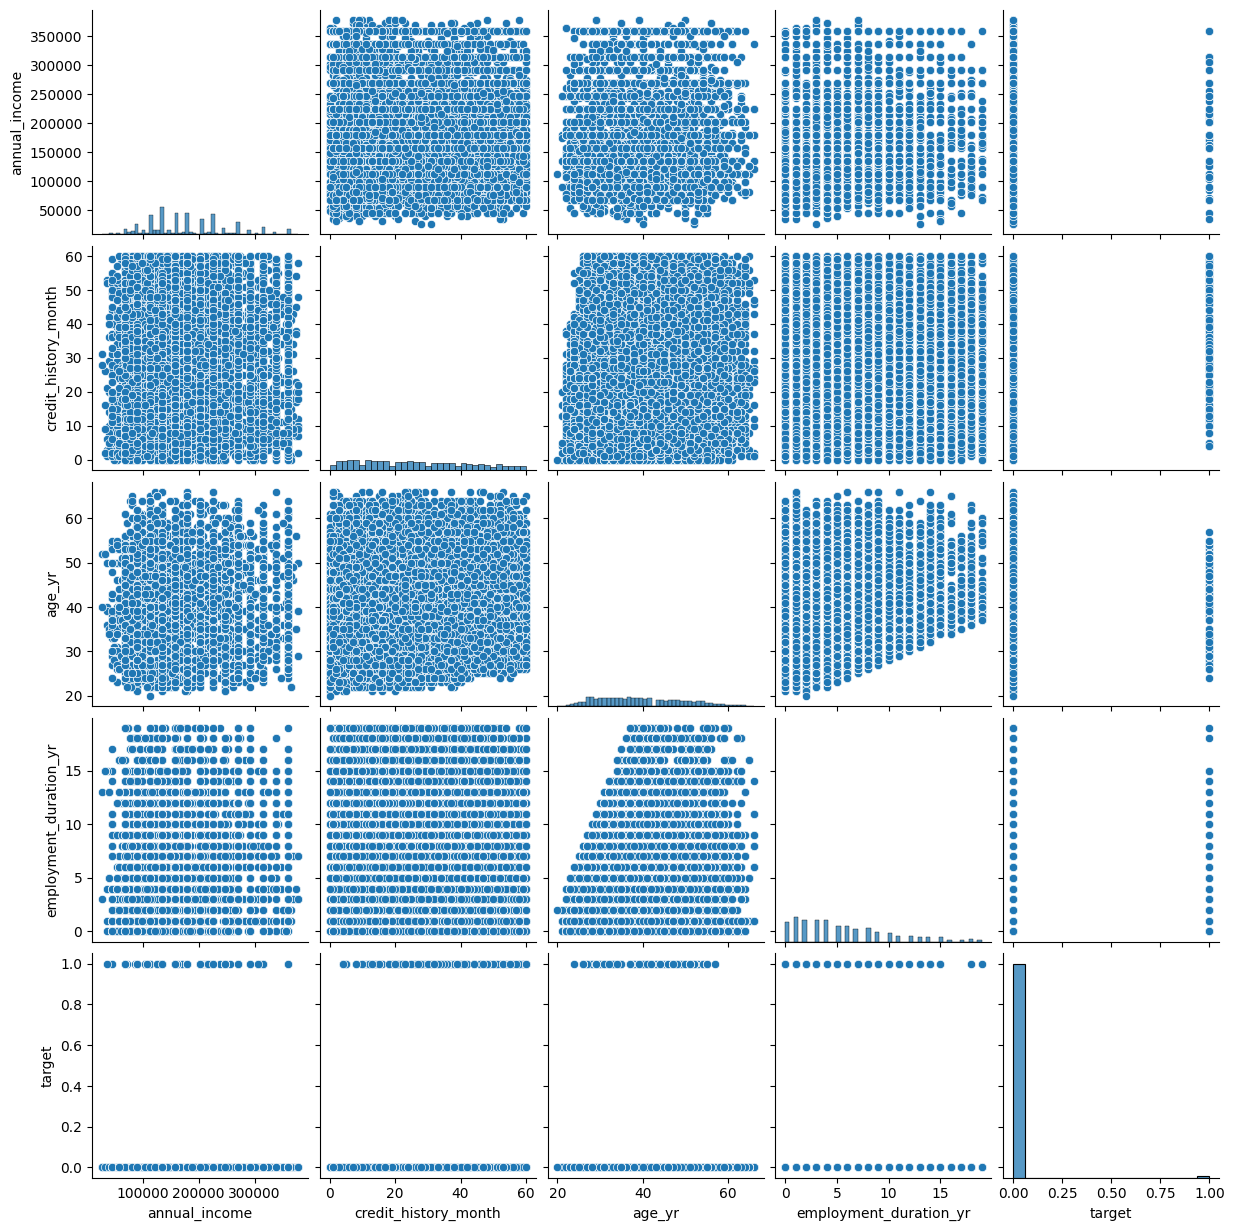

In [55]:
# let's plot a pair plot to look at the distripution and patteren of the feature
sns.pairplot(X_train.drop(columns=['gender', 'car_owned', 'reality_owned', 'child_count_category', 'mobile','work_phone', 'phone', 'email',
                                   'income_category', 'marital_status', 'way_of_living', 'occupation', 'family_size_category']));

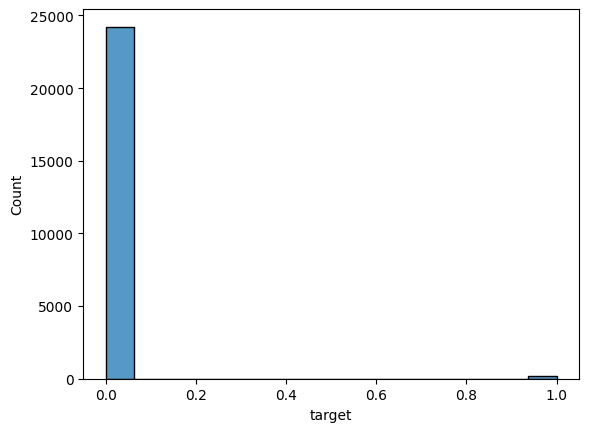

In [56]:
# let's take a look at the presented class
sns.histplot(x='target', data=X_train);

We can see that there is a class imbalance. This can be addressed in many ways including `SMOTE`, and `adjusting the class_weight`, but in this case we will use `SMOTE` because the imbalance was severe

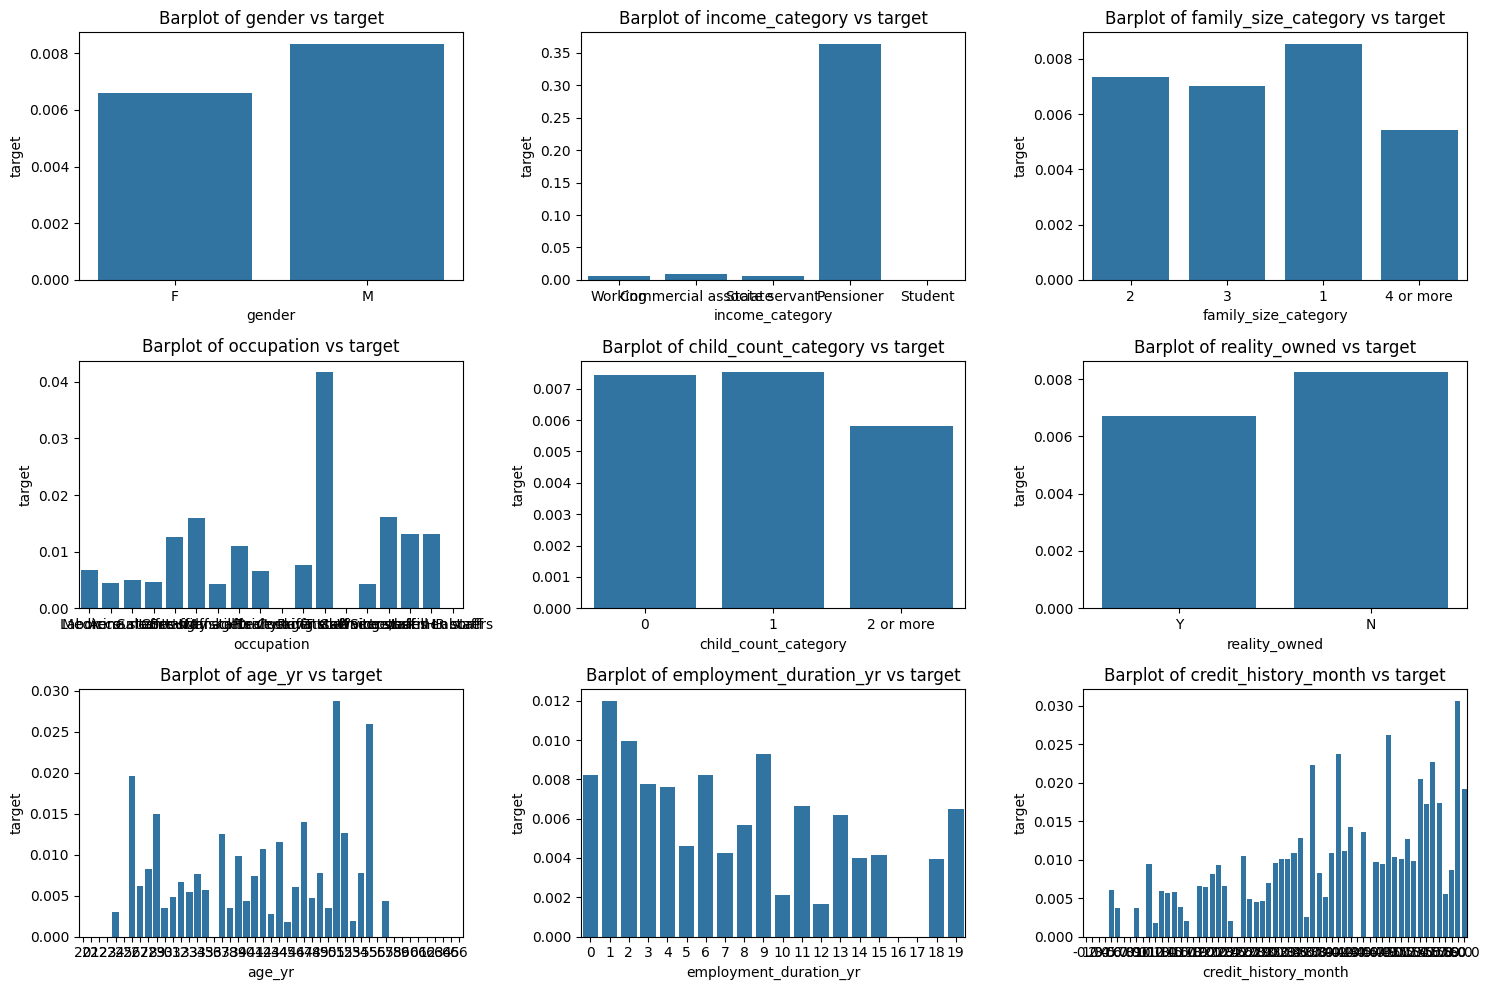

In [57]:
# let's inspect the relationship between the target variable and other features.
columns = ['gender', 'income_category' , 'family_size_category', 'occupation', 'child_count_category', 'reality_owned', 'age_yr', 'employment_duration_yr', 'credit_history_month']
target = "target"  

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))  
axes = axes.flatten()  

# Iterate over columns and create a bar plot for each
for i, col in enumerate(columns):
    sns.barplot(x=col, y=target, data=X_train, ax=axes[i], errorbar= None)
    axes[i].set_title(f"Barplot of {col} vs {target}")
plt.tight_layout()

Now we will encode our categorical values as follows:
- Nominal categorical values will be one-hot encoded
- Ordinal categorical values will be oridnal encoded

one final step is to apply a min-max scaler to numerical values

In [58]:
# Define columns for each transformation
ordinal_encode_cols = ["edu_level", "child_count_category"]
numeric_cols = ["annual_income", "age_yr", "employment_duration_yr", "credit_history_month"]
label_encode_cols = ["family_size_category", "occupation"]
one_hot_cols = [col for col in X_train.columns if col not in ordinal_encode_cols + label_encode_cols + numeric_cols + ["target"]]


# Apply LabelEncoder for family_size_category
for col in label_encode_cols:
    label_encoder = LabelEncoder()
    X_train[col] = label_encoder.fit_transform(X_train[col])

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(), ordinal_encode_cols),  # Ordinal encoding
        ("scale",  StandardScaler(), numeric_cols),          # Scaling numeric columns
        ("onehot", OneHotEncoder(handle_unknown="ignore"), one_hot_cols)  # One-hot encoding
    ],
    remainder="passthrough"  # Keep target untouched
)

# Apply transformations
transformed_data = preprocessor.fit_transform(X_train)

# Generate transformed column names
transformed_columns = (
    ordinal_encode_cols +
    numeric_cols +
    label_encode_cols +
    list(preprocessor.named_transformers_['onehot'].get_feature_names_out(one_hot_cols)) +
    ["target"]  # Columns passed through passthrough
)

# Verify the column count matches
print("Shape of transformed_data:", transformed_data.shape)
print("Number of column names:", len(transformed_columns))

# Convert transformed data to DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=transformed_columns)

transformed_df.head()

Shape of transformed_data: (24403, 38)
Number of column names: 38


,edu_level,child_count_category,annual_income,age_yr,employment_duration_yr,credit_history_month,family_size_category,occupation,gender_F,gender_M,...,way_of_living_Rented apartment,way_of_living_With parents,mobile_1,work_phone_0,work_phone_1,phone_0,phone_1,email_0,email_1,target
0,4.0,0.0,-0.938264,1.027503,2.560531,0.486141,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,8,1,0
1,4.0,0.0,0.013029,0.498809,-0.792237,0.607868,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,8,1,0
2,4.0,1.0,0.647225,-0.241362,-1.015754,1.338232,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,8,2,0
3,4.0,1.0,1.281421,0.287332,1.442942,-0.913723,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,8,2,0
4,4.0,0.0,0.520386,0.075854,1.219424,0.729595,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,11,1,0


Now, after transforming the train data we will apply `SMOTE` to address class imbalance.

In [59]:
# Apply SMOTE on the training data to address class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(transformed_df.drop(columns=['target']), transformed_df['target'].astype(int))

In [60]:
# check the classes 
y_train_smote.value_counts(normalize=True)

target
0    0.5
1    0.5
Name: proportion, dtype: float64

We can see now that we have eliminated the class imbalance problem completely

In [61]:
# making sure that data types stays the same
X_train_smote[numeric_cols] = X_train_smote[numeric_cols].apply(pd.to_numeric, errors='coerce')
y_train_smote = y_train_smote.astype(int)

In [62]:
X_train_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48452 entries, 0 to 48451
Data columns (total 37 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   edu_level                             48452 non-null  object 
 1   child_count_category                  48452 non-null  object 
 2   annual_income                         48452 non-null  float64
 3   age_yr                                48452 non-null  float64
 4   employment_duration_yr                48452 non-null  float64
 5   credit_history_month                  48452 non-null  float64
 6   family_size_category                  48452 non-null  object 
 7   occupation                            48452 non-null  object 
 8   gender_F                              48452 non-null  object 
 9   gender_M                              48452 non-null  object 
 10  car_owned_N                           48452 non-null  object 
 11  car_owned_Y    

In [63]:
y_train_smote.info()

<class 'pandas.core.series.Series'>
RangeIndex: 48452 entries, 0 to 48451
Series name: target
Non-Null Count  Dtype
--------------  -----
48452 non-null  int32
dtypes: int32(1)
memory usage: 189.4 KB


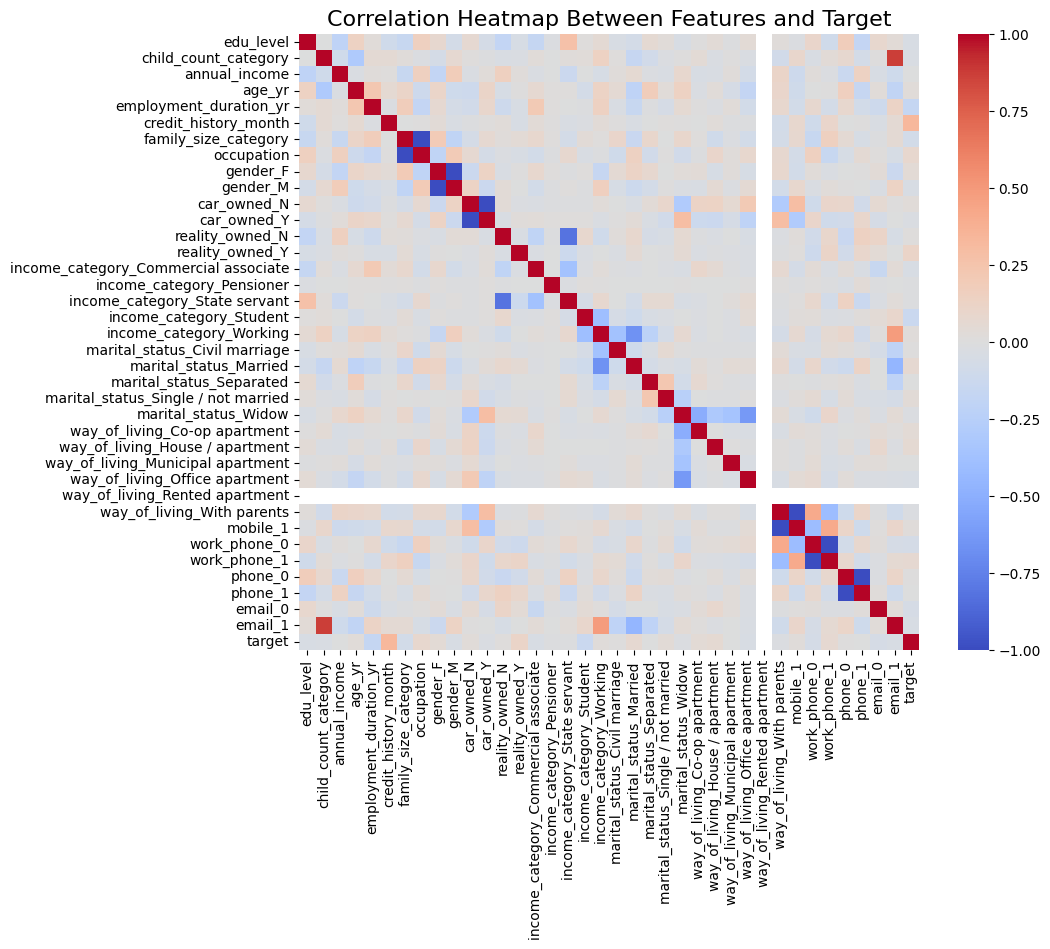

In [64]:
# compute the correlation map and plot is as heatmap
# create a temp variable that include the target to calculate the correlation
temp_df = pd.concat([X_train_smote, y_train_smote], axis=1)

correlation_matrix = temp_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap Between Features and Target", fontsize=16)
plt.show()

<a name='7'></a>
## 7 - Modeling

Now we will choose some classifiers to train and test them on the data to see which one is better.

<a name='7-1'></a>
### 7.1 - Model selection

In [65]:
# split the training data to train and cross validation data sets
X_train_val, X_cv, y_train_val, y_cv = train_test_split(X_train_smote, y_train_smote, random_state=42, test_size=0.1)

Now we will train the selected models and evaluate them using the proper metrics. keeping in mind **class imbalance problem** 

In [66]:
# Define models with class_weight='balanced' to deal with calss imbalance
models = {
    "LogisticRegression": LogisticRegression(random_state=42, max_iter=300),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "XGBClassifier": XGBClassifier()
}

In [67]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import KFold
import numpy as np

# Initialize K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Train and evaluate models
results = {}
modles_trained = {}
for model_name, model in models.items():
    print(f"Training and evaluating: {model_name}")
    
    if model_name == "XGBClassifier":
        X_train_val = X_train_val.apply(pd.to_numeric, errors='coerce')
    
    # Initialize lists to store fold metrics
    fold_accuracies, fold_recalls, fold_precisions, fold_f1s = [], [], [], []
    all_y_true, all_y_pred = [], []
    
    # Perform K-Fold cross-validation
    for train_idx, val_idx in kf.split(X_train_val):
        X_train_fold, X_val_fold = X_train_val.iloc[train_idx], X_train_val.iloc[val_idx]
        y_train_fold, y_val_fold = y_train_val.iloc[train_idx], y_train_val.iloc[val_idx]
        
        # Train the model
        model.fit(X_train_fold, y_train_fold)
        # assign the trained model so we can use them latter
        modles_trained[model_name] = model.fit(X_train_fold, y_train_fold)
        
        # Predict on the validation fold
        y_val_pred = model.predict(X_val_fold)
        
        # Append true and predicted labels for confusion matrix calculation
        all_y_true.extend(y_val_fold)
        all_y_pred.extend(y_val_pred)
        
        # Calculate metrics for this fold
        fold_accuracies.append(accuracy_score(y_val_fold, y_val_pred))
        fold_recalls.append(recall_score(y_val_fold, y_val_pred, average="binary"))
        fold_precisions.append(precision_score(y_val_fold, y_val_pred, average="binary"))
        fold_f1s.append(f1_score(y_val_fold, y_val_pred, average="binary"))
    
    # Calculate average metrics across folds
    accuracy = np.mean(fold_accuracies)
    recall = np.mean(fold_recalls)
    precision = np.mean(fold_precisions)
    f1 = np.mean(fold_f1s)
    cm = confusion_matrix(all_y_true, all_y_pred)
    
    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "F1 Score": f1,
        "Confusion Matrix": cm
    }
    
    # Print metrics and confusion matrix
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("-" * 50)

# Compare models and select the best
best_model = max(results.items(), key=lambda x: x[1]["F1 Score"])
print(f"Best Model: {best_model[0]}")
print("Metrics:")
print(best_model[1])

Training and evaluating: LogisticRegression
Accuracy: 0.6824
Recall: 0.6880
Precision: 0.6799
F1 Score: 0.6839
Confusion Matrix:
[[14771  7057]
 [ 6794 14984]]
--------------------------------------------------
Training and evaluating: DecisionTreeClassifier
Accuracy: 0.9905
Recall: 0.9923
Precision: 0.9887
F1 Score: 0.9905
Confusion Matrix:
[[21581   247]
 [  167 21611]]
--------------------------------------------------
Training and evaluating: RandomForestClassifier
Accuracy: 0.9960
Recall: 0.9946
Precision: 0.9973
F1 Score: 0.9960
Confusion Matrix:
[[21770    58]
 [  118 21660]]
--------------------------------------------------
Training and evaluating: XGBClassifier
Accuracy: 0.9966
Recall: 0.9960
Precision: 0.9971
F1 Score: 0.9966
Confusion Matrix:
[[21766    62]
 [   87 21691]]
--------------------------------------------------
Best Model: XGBClassifier
Metrics:
{'Accuracy': 0.9965830421793529, 'Recall': 0.9960061831789225, 'Precision': 0.997148750177514, 'F1 Score': 0.996576850

<a name='7-1-1'></a>
### 7.1.1 - Learning curve

plot the learning curve for the all the models

In [68]:
def plot_learning_curve(estimator, X, y, cv, model_name, scoring):

    """"
        Plots the learning curve for the given model using scikit-learn 'learning_curve'

        Args:
            estimator(object): The machine learning model to evaluate. 
            X (array-like of shape (n_samples, n_features)):The feature matrix used for training the model.
            y (array-like of shape (n_samples,)): The target variable.
            cv(int): cross-validation generator
            model_name(str): model name
            scoring(str): The scoring metric to evaluate the model. Examples include:

        Returns:
            None
    
    """
    
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
    )

    # Calculate mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label="Training score", marker="o")
    plt.fill_between(train_sizes,
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1)
    plt.plot(train_sizes, val_scores_mean, label="Validation score", marker="o")
    plt.fill_between(train_sizes,
                     val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1)

    # Add labels, title, and legend
    plt.title(f"Learning Curve For {model_name} model")
    plt.xlabel("Training Set Size")
    plt.ylabel(scoring.capitalize())
    plt.legend()
    plt.grid()
    plt.show()

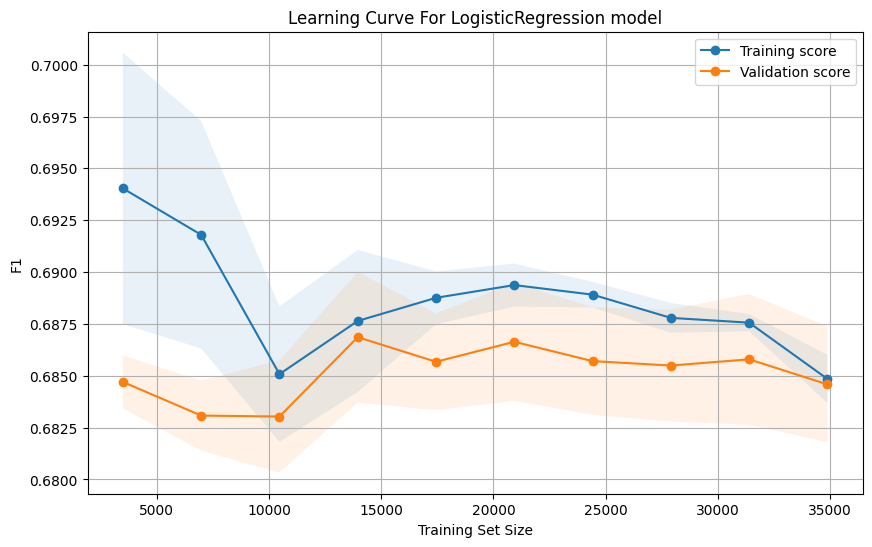

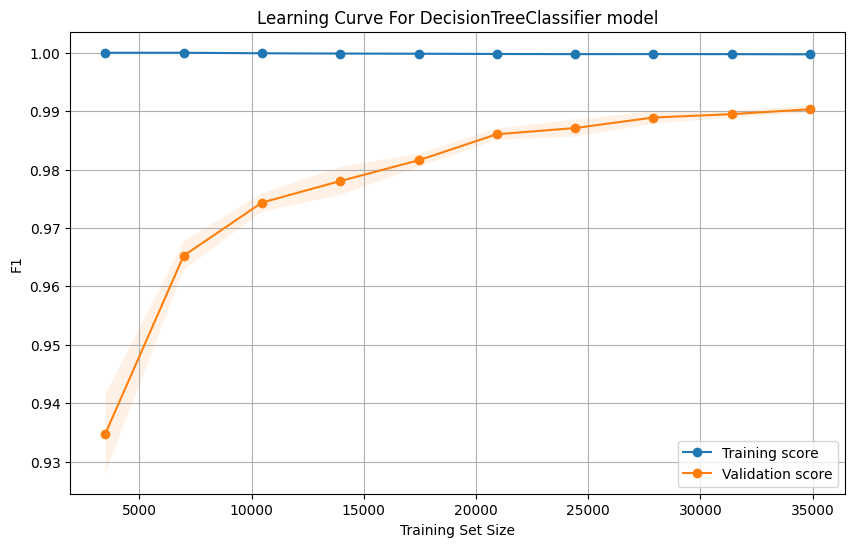

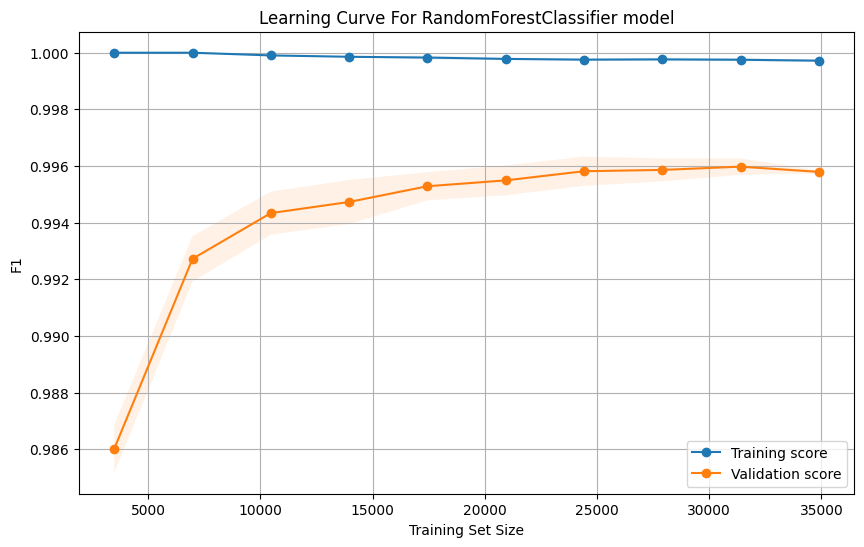

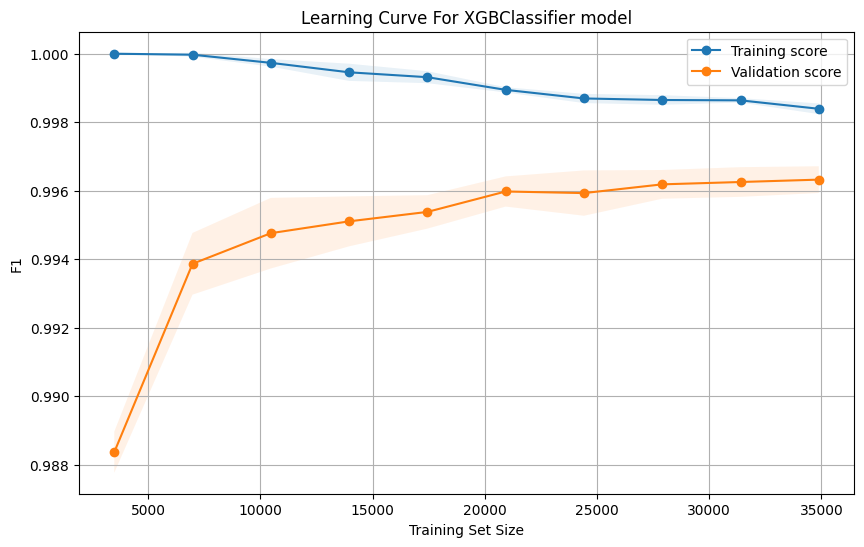

In [69]:
for model_name, model in models.items():
    plot_learning_curve(model, X_train_val, y_train_val, 5, model_name, "f1")

<a name='7-1-2'></a>
#### 7.1.2 - Best Modle test on validation data

In [70]:
# making sure all columns are numeric for XGB boost classifier
X_cv = X_cv.apply(pd.to_numeric, errors='coerce')

# Predict on validation data
y_cv_pred = modles_trained.get(best_model[0]).predict(X_cv)

# Calculate evaluation metrics
accuracy = accuracy_score(y_cv, y_cv_pred)
recall = recall_score(y_cv, y_cv_pred)
precision = precision_score(y_cv, y_cv_pred)
f1 = f1_score(y_cv, y_cv_pred)
cm = confusion_matrix(y_cv, y_cv_pred)
report = classification_report(y_cv, y_cv_pred)

# Print metrics
print("Evaluation Metrics on Validation Data:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

Evaluation Metrics on Validation Data:
Accuracy: 0.9973
Recall: 0.9955
Precision: 0.9992
F1 Score: 0.9973

Confusion Matrix:
[[2396    2]
 [  11 2437]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2398
           1       1.00      1.00      1.00      2448

    accuracy                           1.00      4846
   macro avg       1.00      1.00      1.00      4846
weighted avg       1.00      1.00      1.00      4846



<a name='7-2'></a>
### 7.2 Model finetuning


In this step, we try to tune the hyper-parameters of the XGB boost classifier to try to get the best performance on the test data.

<a name='7-2-1'></a>
#### 7.2.1 Random search

In [71]:
# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': [50, 100, 200, 300, 500],              # Number of trees
    'max_depth': [3, 5, 7, 9, 12],                        # Depth of each tree
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],         # Step size shrinkage
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],               # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],        # Subsample ratio of columns
    'min_child_weight': [1, 3, 5, 7, 10],                 # Minimum sum of instance weights needed in a leaf
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],                     # Minimum loss reduction for a split
    'reg_alpha': [0, 0.1, 0.5, 1, 2],                     # L1 regularization term
    'reg_lambda': [1, 1.5, 2, 3, 5],                      # L2 regularization term
}

In [72]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=XGBClassifier(),
    param_distributions=param_distributions,
    n_iter=50,                  # Number of random combinations to try
    scoring='f1',               # Scoring metric for evaluation
    cv=5,                       # 5-fold cross-validation
    verbose=1,                  # Print progress
    random_state=42,            # Ensure reproducibility
    n_jobs=-1                   # Use all available cores
)

In [73]:
# Perform the randomized search
random_search.fit(X_train_val, y_train_val)

# Print the best parameters and the best score
print("Best Parameters:", random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 0.7, 'reg_lambda': 1.5, 'reg_alpha': 0, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best F1 Score: 0.9965545485864411


We could further search for the best hyper-parameter using `Grid search`. But we will use the ones found using random search. as the results already look promising and do need much tuning.

<a name='8'></a>
## 8 - Model testing

We will now test the XGB boost classifier on the test data, but first we will apply the same tranformation done to train data to test data 

In [74]:
xgb_best = XGBClassifier(
    subsample=0.7,
    reg_lambda=1.5,
    reg_alpha=0,
    n_estimators=200,
    min_child_weight=1,
    max_depth=7,
    learning_rate=0.2,
    gamma=0.1,
    colsample_bytree=0.8,
    random_state=42,    
    eval_metric='logloss' )

# train on the complete train data
X_train_smote = X_train_smote.apply(pd.to_numeric, errors='coerce')
xgb_best.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [75]:
# transform test data
X_test['target'] = y_test
X_test_transformed = preprocessor.transform(X_test)

# Generate transformed column names
transformed_columns = (
    ordinal_encode_cols +
    numeric_cols +
    label_encode_cols +
    list(preprocessor.named_transformers_['onehot'].get_feature_names_out(one_hot_cols)) +
    ["target"]  # Columns passed through passthrough
)

# Verify the column count matches
print("Shape of transformed_data:", transformed_data.shape)
print("Number of column names:", len(transformed_columns))

# Convert transformed data to DataFrame
X_test_transformed = pd.DataFrame(X_test_transformed, columns=transformed_columns)


X_test_transformed = X_test_transformed.apply(pd.to_numeric, errors='coerce')
X_test_transformed

Shape of transformed_data: (24403, 38)
Number of column names: 38


,edu_level,child_count_category,annual_income,age_yr,employment_duration_yr,credit_history_month,family_size_category,occupation,gender_F,gender_M,...,way_of_living_Rented apartment,way_of_living_With parents,mobile_1,work_phone_0,work_phone_1,phone_0,phone_1,email_0,email_1,target
0,1.0,1.0,-0.304069,-1.404489,-1.239272,-0.061632,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,NaN,3.0,0
1,1.0,1.0,-1.572460,-0.981534,-0.792237,-0.365950,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,NaN,3.0,0
2,4.0,2.0,-0.621166,-0.452840,1.442942,-0.913723,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,NaN,NaN,0
3,4.0,0.0,1.281421,0.075854,1.889977,-0.000768,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN,2.0,0
4,1.0,0.0,0.647225,-0.029885,0.772388,0.912186,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,NaN,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2707,1.0,1.0,0.139868,-0.347101,0.995906,-0.548541,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,NaN,3.0,0
2708,4.0,2.0,-0.113810,-0.241362,2.113495,-0.791995,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0
2709,1.0,0.0,1.915616,-1.721706,-0.568719,-1.400632,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,NaN,2.0,0
2710,1.0,1.0,1.598519,0.710287,0.772388,-0.244223,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN,3.0,0


In [76]:
# making sure all columns are numeric for XGB boost classifier
X_test_transformed = X_test_transformed.apply(pd.to_numeric, errors='coerce')

y_test_pred = xgb_best.predict(X_test_transformed.drop(columns = ['target']))

# Calculate evaluation metrics
accuracy = accuracy_score(X_test_transformed['target'], y_test_pred)
recall = recall_score(X_test_transformed['target'], y_test_pred)
precision = precision_score(X_test_transformed['target'], y_test_pred)
f1 = f1_score(X_test_transformed['target'], y_test_pred)
cm = confusion_matrix(X_test_transformed['target'], y_test_pred)
report = classification_report(X_test_transformed['target'], y_test_pred)

# Print metrics
print("Evaluation Metrics on Validation Data:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

Evaluation Metrics on Validation Data:
Accuracy: 0.9904
Recall: 0.1111
Precision: 0.6000
F1 Score: 0.1875

Confusion Matrix:
[[2683    2]
 [  24    3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2685
           1       0.60      0.11      0.19        27

    accuracy                           0.99      2712
   macro avg       0.80      0.56      0.59      2712
weighted avg       0.99      0.99      0.99      2712



<a name='9'></a>
## 9 - Conclusion

We can see that `XGB boost` achieved amazing results with an `f1` score equal to `0.99`. So to summarize what we have done so far is the following:
- Explored the dataset
- Created the target variable
- performed data preprocessing
- feature engineered some features
- handled class imbalance problem
- performed EDA
- transformed and staged the train data
- Model selection
- Fine-tuning using random search
- Model testing on the test data